***Handwritten Digits Classification Using Tensorflow***

In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [6]:
(X_train, y_train) , (X_test, y_test) =keras.datasets.mnist.load_data()

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
y_train.shape

(60000,)

In [9]:
X_train = X_train / 255
X_test = X_test / 255
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [11]:
X_train_flattened.shape

(60000, 784)

In [12]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4695 - accuracy: 0.8774
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3040 - accuracy: 0.9151
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2835 - accuracy: 0.9205
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2730 - accuracy: 0.9235
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2667 - accuracy: 0.9248
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2620 - accuracy: 0.9273
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2584 - accuracy: 0.9282
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2554 - accuracy: 0.9288
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2534 - accuracy: 0.9291
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.250

In [13]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2647 - accuracy: 0.9265


[0.2647136151790619, 0.9265000224113464]

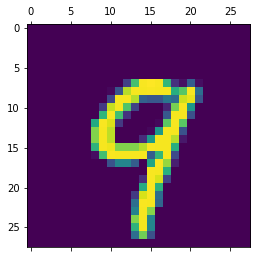

In [14]:
plt.matshow(X_test[12])

In [15]:
y_predicted = model.predict([X_test_flattened])
y_predicted[0]

array([3.9368868e-03, 1.0004500e-08, 1.0214925e-02, 9.7201782e-01,
       1.1664629e-03, 1.3803086e-01, 2.7545074e-08, 9.9983209e-01,
       7.5920999e-02, 6.9952947e-01], dtype=float32)

In [16]:
np.argmax(y_predicted[0])

7

In [17]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [18]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [19]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    5,    4,    3,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   5,    8,  920,   17,    8,    5,   11,   12,   41,    5],
       [   3,    0,   18,  925,    0,   22,    2,   12,   20,    8],
       [   1,    1,    5,    3,  910,    0,    6,    4,   10,   42],
       [   7,    2,    3,   34,    9,  782,   10,    8,   31,    6],
       [  12,    3,    9,    1,    8,   14,  907,    2,    2,    0],
       [   1,    6,   22,    7,    4,    1,    0,  951,    2,   34],
       [   7,    7,    5,   21,    9,   25,    8,   10,  871,   11],
       [  11,    7,    1,    8,   20,    6,    0,   23,    7,  926]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

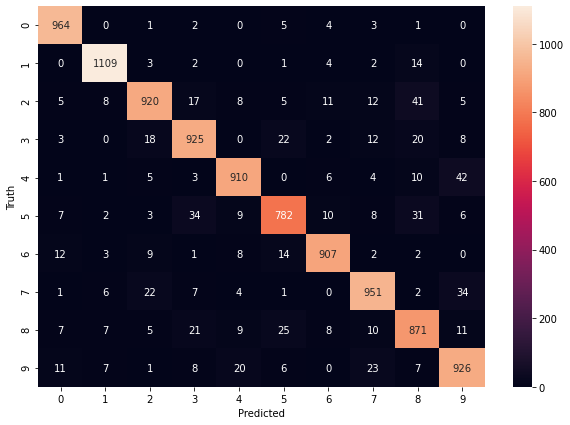

In [20]:

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
model = keras.Sequential([
       keras.layers.Dense(100, input_shape=(784,), activation='relu') ,                   
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2726 - accuracy: 0.9226
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1218 - accuracy: 0.9638
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0839 - accuracy: 0.9751
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0642 - accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0515 - accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0404 - accuracy: 0.9876
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0339 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0275 - accuracy: 0.9917
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0236 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

In [22]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0854 - accuracy: 0.9765


[0.08544518053531647, 0.9764999747276306]

In [23]:
y_predicted = model.predict([X_test_flattened])
y_predicted_labels = [np.argmax(i) for i in y_predicted]

Text(69.0, 0.5, 'Truth')

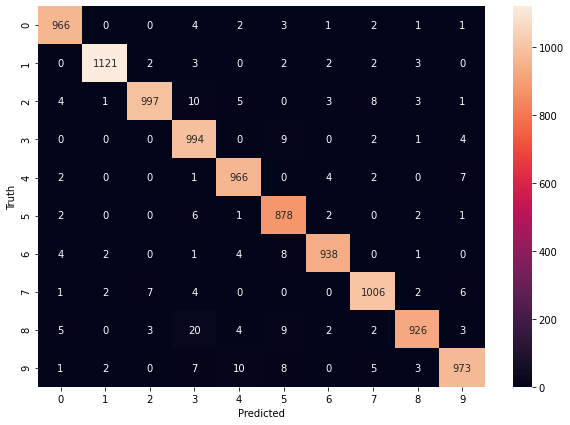

In [24]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')